In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 27: Grace Notes

Grace notes present particular problems for almost all computer representations of scores.  In one way of theorizing them, they take up no time whatsoever -- you can take a full measure of 4/4 and add two hundred grace notes and the measure is still not over full.  On the other hand, they need to take up some time, otherwise how would we hear them?

So we have something that takes up no time, but takes up time, at the same time.  Let's look more closely at them.  Along the way we'll look at appogiature, which present some issues that are similar and some that are different.

## Basic Graces

We'll begin by creating a 4/4 measure of four quarter notes:

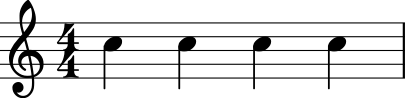

In [2]:
from music21 import *

m = stream.Measure()
m.append(meter.TimeSignature('4/4'))
m.repeatAppend(note.Note('C5'), 4)
m.show()

Now let's insert a D-grace note just before the third quarter note.  First we create a normal note (usually an eighth note) and then we create a new grace note with the `getGrace` method.

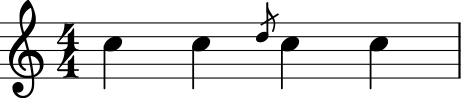

In [3]:
d = note.Note('D5', type='eighth')
dGrace = d.getGrace()
m.insert(2.0, dGrace)
m.show()

If we look at `dGrace` at first it appears to be just a normal Note:

In [4]:
dGrace

<music21.note.Note D>

But its `duration` is a subclass called `GraceDuration`.  Importantly, it is an "unlinked" duration, meaning that the `type` (e.g. "eighth") of the duration does not say how long it lasts.

In [5]:
dGrace.duration

<music21.duration.GraceDuration unlinked type:zero quarterLength:0.0>

In [6]:
dGrace.duration.linked

False

There is one `DurationTuple` in the `.components` of the GraceDuration object, and it is an eighth note of length 0.

In [7]:
dGrace.duration.components

(DurationTuple(type='eighth', dots=0, quarterLength=0.0),)

A GraceDuration has the boolean attribute `.slash` which says whether or not it receives a slash.  By default this is True.

In [8]:
dGrace.duration.slash

True

Within a `Stream` grace notes sort before elements of the same class that have the same priority and offset.  Internally, this is done by setting `isNotGrace` to 0 in the sort tuple. (normally it is 1).

In [9]:
dGrace.sortTuple()

SortTuple(atEnd=0, offset=2.0, priority=0, classSortOrder=20, isNotGrace=0, insertIndex=146)

Normally grace notes are slurred to the following note, so let's add a slur there.

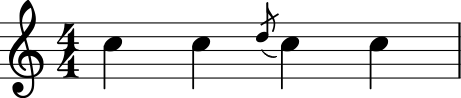

In [10]:
thirdNote = m.notes[-2]
sl = spanner.Slur(dGrace, thirdNote)
m.insert(0, sl)
m.show()

## Multiple Grace Notes

Multiple grace notes are normally beamed together and generally written as sixteenth or thirty-second notes.  We'll add two graces to the last C in the measure:

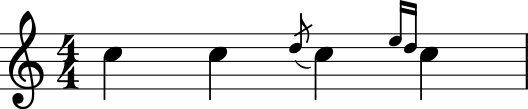

In [11]:
eGrace = note.Note('E5', type='16th').getGrace()
dGrace2 = note.Note('D5', type='16th').getGrace()
eGrace.beams.fill(2, 'start')
dGrace2.beams.fill(2, 'stop')
m.insert(3.0, eGrace)
m.insert(3.0, dGrace2)
m.show()

Notice that the grace notes are ordered according to the principle, "first inserted = left-most, last inserted = right-most."  If you know every note to be inserted in advance, then there's no problem getting the order right. But suppose you need to change it later?  In this case, change the priority of the grace notes:

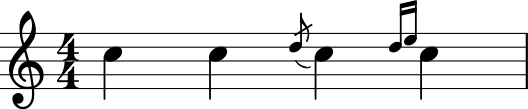

In [12]:
dGrace2.priority = -1
m.show()

Note that the default priority of all objects is 0, so that by giving a priority higher than 1, the grace notes can be made to follow the main note:

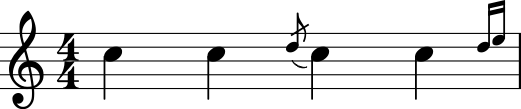

In [13]:
dGrace2.priority = 1
eGrace.priority = 2
m.show()

This is useful for cases such as putting a "Nachschlag" or "Nachschlagen" after a trill:

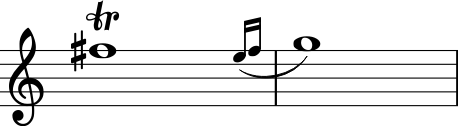

In [14]:
p = stream.Part()
m1 = stream.Measure()
n2 = note.Note('F#5', type='whole')
nach1 = note.Note('E5', type='16th').getGrace()
nach2 = note.Note('F#5', type='16th').getGrace()
nach1.priority = 1
nach2.priority = 2

trMark = expressions.Trill()
n2.expressions.append(trMark)

m1.insert(0, n2)
m1.insert(0, nach1)
m1.insert(0, nach2)

p.append(m1)

m2 = stream.Measure()
nResolve = note.Note('G5', type='whole')
m2.append(nResolve)
p.append(m2)

# nResolve is necessary because 
# MuseScore has a bug with spanners that end with grace notes.
nachSlur = spanner.Slur([nach1, nach2, nResolve])
p.insert(0, nachSlur)

# beams are also created automagically on show
p.show()

## Stealing time

`.stealTimePrevious` and `.stealTimeFollowing` are values from 0 to 1 that show what fraction of the previous or following note's durations should be allocated to make room for this grace note.

MIDI output does not yet support playing back grace notes.

[more to be written]

That's enough on grace notes for now.  Let's move to finding things with something to say: :ref:`Chapter 28: Lyric Searching <usersGuide_28_lyricSearcher>`